In [1]:
import dataclasses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
@dataclasses.dataclass
class Data:
    train: pd.DataFrame
    test: pd.DataFrame

In [3]:
FILES = ('discounts_train_scored.parq.gzip', 'discounts_test_scored.parq.gzip')

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [4]:
data = Data(pd.read_parquet(FILES[0]), pd.read_parquet(FILES[1]))
data.test.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit,sales_prediction
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1503.22,20.0,35,1.0,MA,23,55.16,2292.466177
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,5.0,5.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1798.30,60.0,29,1.0,MG,18,29.92,1734.958214
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1122.97,0.0,30,1.0,RJ,20,56.15,1855.784629
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,25,95.0,10.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1217.08,10.0,32,0.0,BA,20,50.85,2236.858599
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,966.58,0.0,30,0.0,PB,22,48.33,1667.244759


In [7]:
fit_1 = smf.ols(
    'profit ~ discount + tenure + age + cust_state + discount:tenure + discount:age + discount:cust_state',
    data=data.train
).fit()

fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     80.61
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:55:03   Log-Likelihood:                -66534.
No. Observations:               15000   AIC:                         1.332e+05
Df Residuals:                   14942   BIC:                         1.336e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    60.0862      5.278     11.383      0.000      49.740      70.433
cust_state[T.AL]             -8.2169      5.870     -1.400      0.162     -19.723       3.289
cust_state[T.AM]             -1.6800      5.448     -0.308      0.758     -12.359       8.999
cust_state[T.AP]             -6.2469      8.917     -0.701      0.484     -23.725      11.232
cust_state[T.BA]             -0.1098      4.970     -0.022      0.982      -9.852       9.632
cust_state[T.CE]             -3.9423      5.142     -0.767      0.443     -14.022       6.137
cust_state[T.DF]             -3.5583      5.406     -0.658      0.510     -14.154       7.038
cust_state[T.ES]             -0.3840      5.320     -0.072      0.942     -10.812      10.044
cust_state[T.GO]             -1.2891      5.211     -0.247      0.805     -11.503       8.925
cust_state[T.MA]             -2.7638      5.265     -0.525      0.600     -13.084       7.556
cust_state[T.MG]             -2.1676      4.976     -0.436      0.663     -11.921       7.586
cust_state[T.MS]              1.4205      5.583      0.254      0.799      -9.522      12.363
cust_state[T.MT]              2.0380      5.800      0.351      0.725      -9.331      13.407
cust_state[T.PA]             -4.4013      5.295     -0.831      0.406     -14.780       5.977
cust_state[T.PB]             -0.1522      5.561     -0.027      0.978     -11.052      10.747
cust_state[T.PE]             -6.6361      5.240     -1.267      0.205     -16.906       3.634
cust_state[T.PI]              1.4468      5.847      0.247      0.805     -10.014      12.907
cust_state[T.PR]             -0.9615      5.031     -0.191      0.848     -10.823       8.900
cust_state[T.RJ]             -1.1884      4.971     -0.239      0.811     -10.933       8.556
cust_state[T.RN]             -2.7792      5.555     -0.500      0.617     -13.668       8.109
cust_state[T.RO]             -0.8899      5.854     -0.152      0.879     -12.365      10.585
cust_state[T.RR]             -9.3344      7.681     -1.215      0.224     -24.390       5.721
cust_state[T.RS]             -0.4782      5.030     -0.095      0.924     -10.337       9.381
cust_state[T.SC]             -1.4228      5.135     -0.277      0.782     -11.489       8.643
cust_state[T.SE]             -3.2937      6.069     -0.543      0.587     -15.189       8.602
cust_state[T.SP]             -0.7210      4.881     -0.148      0.883     -10.288       8.846
cust_state[T.TO]             -5.5984      7.321     -0.765      0.444     -19.948       8.752
discount                     -0.5721      0.062     -9.179      0.000      -0.694      -0.450
discount:cust_state[T.AL]    -0.0191      0.068     -0.282      0.778      -0.152       0.114
discount:cust_state[T.AM]     0.0236      0.065      0.364      0.716      

In [11]:
preds = fit_1.predict(data.test)

In [12]:
perturbed = data.test.copy()
perturbed['discount'] -= 1
preds_pert = fit_1.predict(perturbed)

In [95]:
te = preds - preds_pert
te.head()

0    0.018418
1   -0.071521
2   -0.027969
3    0.038362
4   -0.093894
dtype: float64

In [111]:
data.test['te_pred'] = te

In [112]:
def elast_by_segment(data, segment_col, treatment_col='discount', q=5):
    quantiles = pd.qcut(data[segment_col], q=q, labels=False, retbins=False, duplicates='drop')
    return data.assign(segment=quantiles) \
                .groupby('segment') \
                .apply(lambda grp: elast(grp, treatment_col, 'profit')) \
                .reset_index(name='treatment_effect')

In [116]:
elast_by_segment(data.test, 'te_pred', q=10)

,segment,treatment_effect
0,0,-0.137056
1,1,-0.133709
2,2,-0.079235
3,3,-0.092699
4,4,-0.051614
5,5,-0.062815
6,6,-0.026394
7,7,0.001618
8,8,0.044076
9,9,0.174941


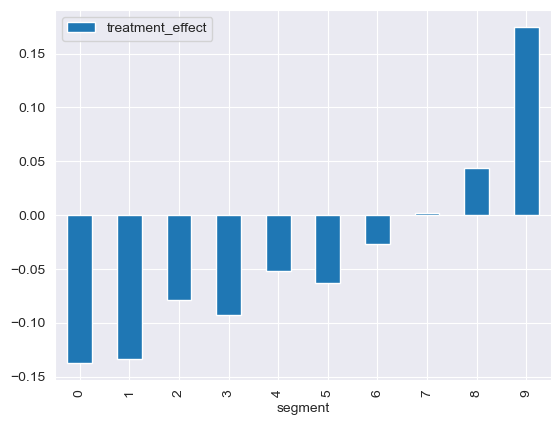

In [117]:
elast_by_segment(data.test, 'te_pred', q=10).plot(kind='bar', x='segment')
plt.show()

In [125]:
def cumulative_elast_curve(data, order_by, treatment_col='discount', ascending=False):
    ordered = data.sort_values(order_by, ascending=ascending)
    percentiles = np.arange(0., 1., .01)
    edges = [data[order_by].quantile(x) for x in percentiles]
    res = [
        elast(ordered.query(f'{order_by} >= {e}'), treatment_col, 'profit')
        for e in edges[::-1]
    ]
    sns.lineplot(x=percentiles, y=res, label=order_by)
    plt.ylabel('Cumulative Treatment Effect')
    plt.xlabel('% of Customers')
    plt.title('Cumulative Elasticity Curve')
    # plt.show()

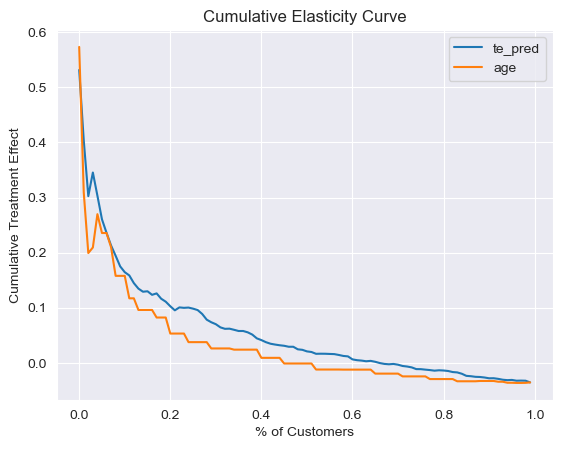

In [126]:
cumulative_elast_curve(data.test, 'te_pred')
cumulative_elast_curve(data.test, 'age')
plt.show()

In [76]:
def elast(data, x, y):
    cov = data[[x, y]].cov()
    return cov.iloc[1, 0] / cov.iloc[0, 0]

In [121]:
def cumulative_gain(data, order_by, treatment_col='discount', ascending=False):
    ordered = data.sort_values(order_by, ascending=ascending)
    percentiles = np.arange(0., 1., .01)
    edges = [data[order_by].quantile(x) for x in percentiles]
    res = [
        elast(ordered.query(f'{order_by} >= {e}'), treatment_col, 'profit') * p
        for e,p in zip(edges[::-1], percentiles)
    ]
    sns.lineplot(x=percentiles, y=res, label=order_by)
    plt.ylabel('Cumulative Gain')
    plt.xlabel('% of Customers')
    plt.title('Cumulative Gain Curve')
    plt.axline((0, 0), (1, elast(data, treatment_col, 'profit')), color='black', linestyle='dotted', alpha=.25)
    # plt.show()

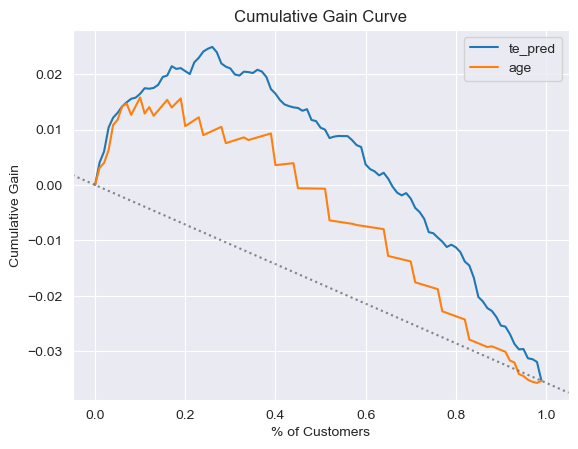

In [123]:
cumulative_gain(data.test, 'te_pred')
cumulative_gain(data.test, 'age')
plt.show()